In [81]:
import numpy as np
import matplotlib.pyplot as plt

### 데이터 설정
Perceptron의 가중치를 학습하기 위한 데이터로 AND 게이트를 사용했습니다.  
AND Gate는 다음과 같은 값을 가집니다.
| x1 | x2 | y |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

In [ ]:
# AND 데이터 설정
x = np.array([
    [0,0], [0,1], [1,0], [1,1],
])
y = np.array([0,0,0,1])

### 가중치 초기화
학습의 주체인 가중치를 초기화 합니다.  
가중치는 입력 수와 동일하게 2개이며, bias값도 가중치 배열에 추가합니다.  

In [ ]:
# weight 초기화
# w = [bias, w1, w2]
w = np.array([-0.3, 0.1, 0.4])

### 초기 가중치값과 그래프
Perceptron은 1과 0으로 구분하는 이진 분류기 입니다.  

$$ 
y = \begin{cases}
1 & w_1x_1+w_2x_2+b > 0 \\
0 & w_1x_1+w_2x_2+b <= 0
\end{cases}
$$

위의 식과 같이 가중합 0보다 크면 1, 0보다 작거나 같으면 0으로 분류합니다.  

In [ ]:
def show_plt():
    plt.clf()
    plt.scatter(x[0][0], x[0][1], c='red')
    plt.scatter(x[1][0], x[1][1], c='red')
    plt.scatter(x[2][0], x[2][1], c='red')
    plt.scatter(x[3][0], x[3][1], c='blue')

    line_x = np.linspace(-1,2,5)
    line_y = -1*(1/w[2]*(w[1]*line_x + w[0]))
    plt.plot(line_x, line_y)

    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.show()


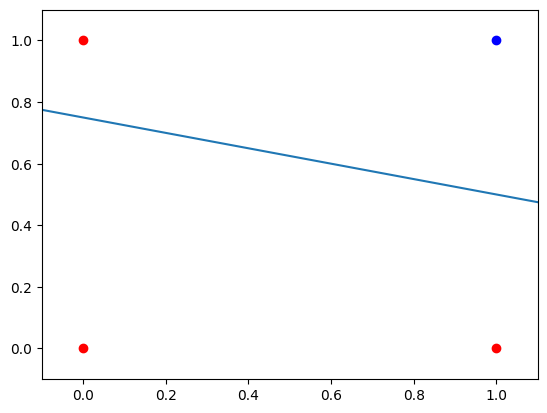

In [ ]:
# 초기 선형분류 직선 출력
show_plt()

### Perceptron 순방향 설정
Perceptron은 다음과 같은 과정을 통해 예측값을 출력합니다.
1. 입력값 입력
2. 가중합
3. 계단함수
4. 예측값 출력

여기서 가중합은 다음을 의미합니다.
$$ z = \sum_i^n w_ix_i +b$$

계단함수는 다음을 의미합니다.
$$
y = \begin{cases}
1 & z > 0 \\
0 & z <= 0
\end{cases} 
$$

In [ ]:
# forward 설정
# w1*x1 + w2*x2 + b
# 가중합이 0보다 크면 1, 아니면 0 출력
def forward(x):
    X = np.dot(x, w[1:]) + w[0]
    return np.where(X > 0, 1, 0)

### Perceptron 학습
Perceptron 학습은 간단하게 실제값과 예측값의 오차에 대한 Learning Rate(학습률)만 설정했습니다.  

In [ ]:
print("predict (before traning)", w)
save_weight = []
learning_rate = 0.01

for epoch in range(10):
    for x_val, y_val in zip(x,y):
        update = learning_rate * (y_val - forward(x_val))
        w[1:] += update * x_val
        w[0] += update
    save_weight.append(w.copy())

print("predict (after traning)", w)        

predict (before traning) [-0.3  0.1  0.4]
predict (after traning) [-0.35  0.1   0.35]


다음과 같이 초기 가중치에서 변한 모습을 볼 수 있습니다.  
분류 직선이 어떻게 바뀌었는지 그래프로 확인해 봅시다.

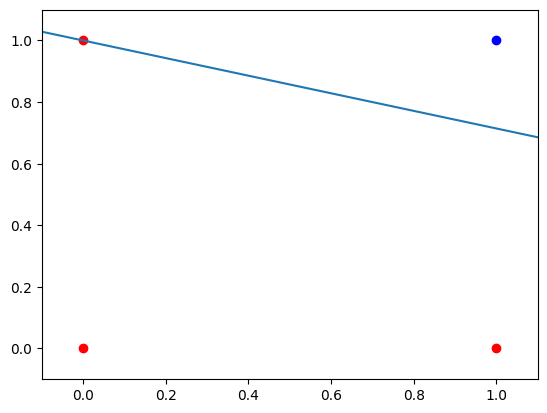

In [89]:
show_plt()

마지막으로 학습된 Perceptron이 실제로 AND게이트로써 잘 작동하는지 예측값을 출력해봅니다.

In [90]:
for a in x:
    print(f'{a} : {forward(a)}')

[0 0] : 0
[0 1] : 0
[1 0] : 0
[1 1] : 1


아래의 save_weight은 가중치가 각 학습 회차에 따라 어떻게 변했는지 보여줍니다.

In [91]:
save_weight

[array([-0.31,  0.1 ,  0.39]),
 array([-0.32,  0.1 ,  0.38]),
 array([-0.33,  0.1 ,  0.37]),
 array([-0.34,  0.1 ,  0.36]),
 array([-0.35,  0.1 ,  0.35]),
 array([-0.35,  0.1 ,  0.35]),
 array([-0.35,  0.1 ,  0.35]),
 array([-0.35,  0.1 ,  0.35]),
 array([-0.35,  0.1 ,  0.35]),
 array([-0.35,  0.1 ,  0.35])]